Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 175s 219ms/step - accuracy: 0.2573 - loss: 2.1607 - val_accuracy: 0.3449 - val_loss: 2.1530
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 204s 223ms/step - accuracy: 0.4281 - loss: 1.5598 - val_accuracy: 0.5395 - val_loss: 1.3334
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.5402 - loss: 1.3321
Test Accuracy: 0.5395


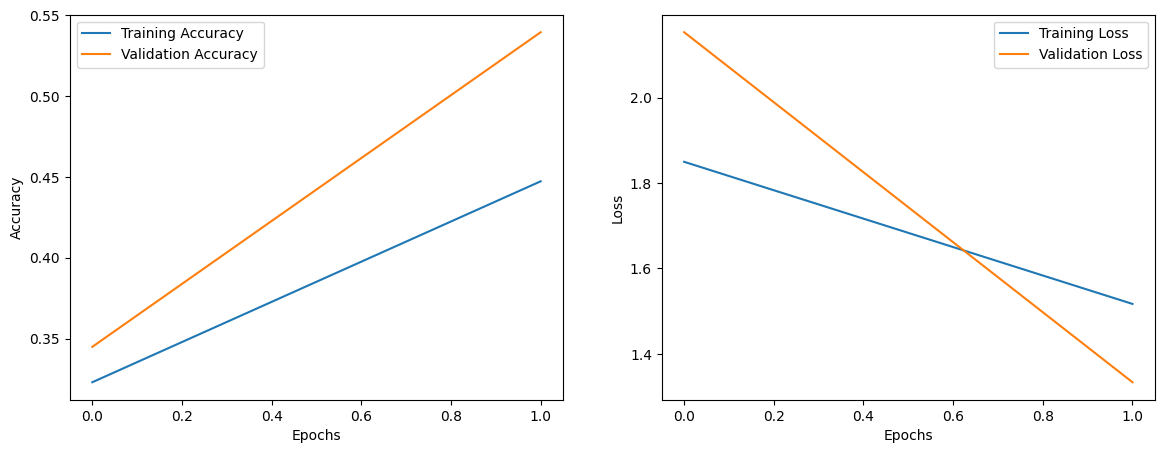

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, BatchNormalization, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Stage 1: Loading and Preprocessing the Image Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0

# Convert labels to categorical format
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Stage 2: Defining the Model’s Architecture
input_shape = x_train.shape[1:]

input_layer = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.3)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.4)(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(10, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Stage 3: Training the Model with 2 Epochs
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

# Stage 4: Estimating the Model’s Performance
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plotting the training and validation accuracy and loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
